In [2]:
!pip install imgviz tinydb tifffile

You should consider upgrading via the '/home/ws/tb0536/anaconda3/bin/python -m pip install --upgrade pip' command.


In [3]:
import tifffile
from matplotlib import pyplot as plt
%matplotlib inline
from tinydb import TinyDB, Query
import imgviz
import numpy as np

In [4]:
img = tifffile.imread('tmp_data/scaled_0.5_uint8_Medaka_529_39-2.tif.tif')
lbl_raw = tifffile.imread('tmp_data/segmented_scaled_0.5_uint8_Medaka_529_39-2.tif.tif')
lbl = tifffile.imread('tmp_data/postprocessed_segmented_scaled_0.5_uint8_Medaka_529_39-2.tif.tif')

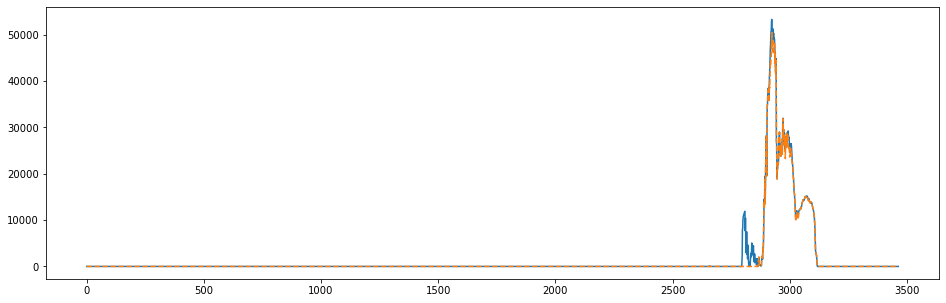

In [6]:
plt.figure(figsize=(16, 5))
plt.plot(lbl_raw.sum((1, 2)), label='raw label')
plt.plot(lbl.sum((1, 2)), label='cleaned label', linestyle='--')
plt.show()

In [7]:
np.where((lbl_raw.sum((1, 2)) - lbl.sum((1, 2))) != 0)

(array([2658, 2730, 2796, 2797, 2798, 2799, 2800, 2801, 2802, 2803, 2804,
        2805, 2806, 2807, 2808, 2809, 2810, 2811, 2812, 2813, 2814, 2815,
        2816, 2817, 2818, 2819, 2820, 2821, 2822, 2823, 2824, 2825, 2826,
        2829, 2830, 2831, 2832, 2833, 2834, 2835, 2836, 2837, 2838, 2839,
        2840, 2841, 2842, 2843, 2844, 2845, 2846, 2847, 2848, 2849, 2850,
        2851, 2852, 2853, 2854, 2855, 2856, 2857, 2858, 2859, 2860, 2861,
        2862, 2863, 2875, 2883, 2885, 2890, 2891, 2892, 2893, 2894, 2903,
        2904, 2905, 2906, 2907, 2908, 2909, 2910, 2911, 2912, 2913, 2914,
        2915, 2916, 2917, 2918, 2919, 2920, 2921, 2922, 2923, 2924, 2925,
        2926, 2927, 2928, 2929, 2930, 2931, 2932, 2933, 2934, 2935, 2936,
        2937, 2938, 2939, 2940, 2941, 2942, 2943, 2944, 2945, 2947, 2948,
        2949, 2950, 2951, 2953, 2954, 2955, 2958, 2964, 2965, 2966, 2971,
        2972, 2973, 2975, 2976, 2978, 2979, 2980, 2981, 2982, 2983, 2984,
        2985, 2987, 2988, 2989, 2990, 

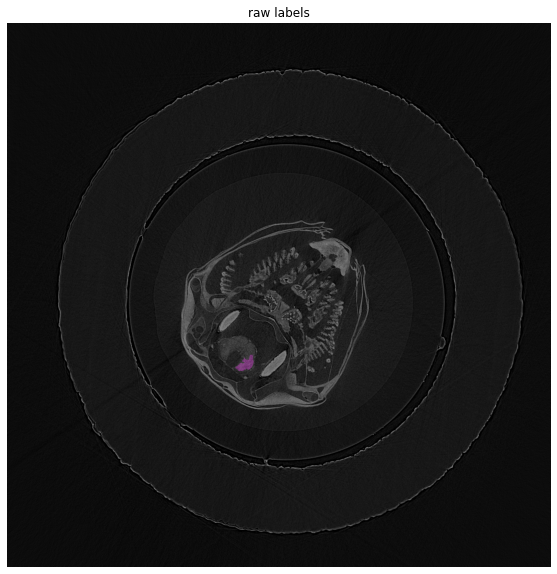

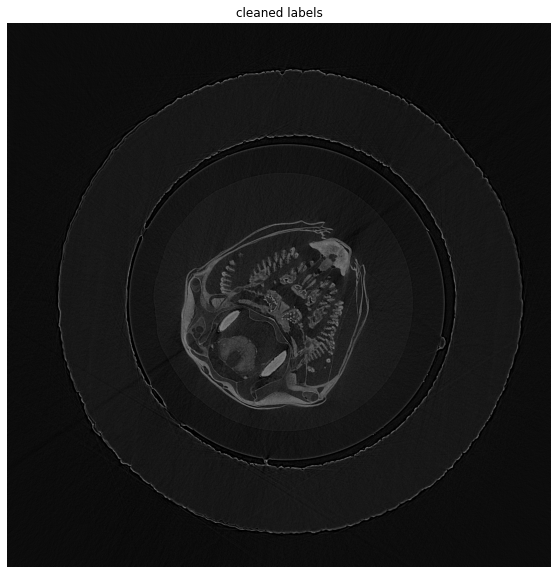

In [8]:
slc_id = 2850
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(imgviz.label2rgb(lbl_raw[slc_id], img[slc_id]))
plt.title('raw labels')
plt.show()

plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(imgviz.label2rgb(lbl[slc_id], img[slc_id]))
plt.title('cleaned labels')
plt.show()

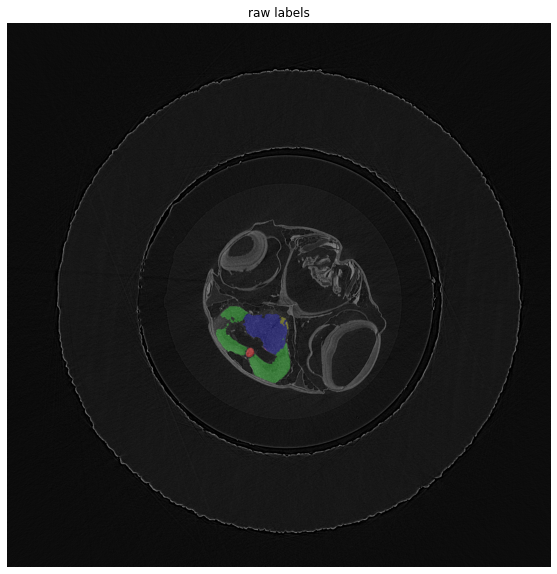

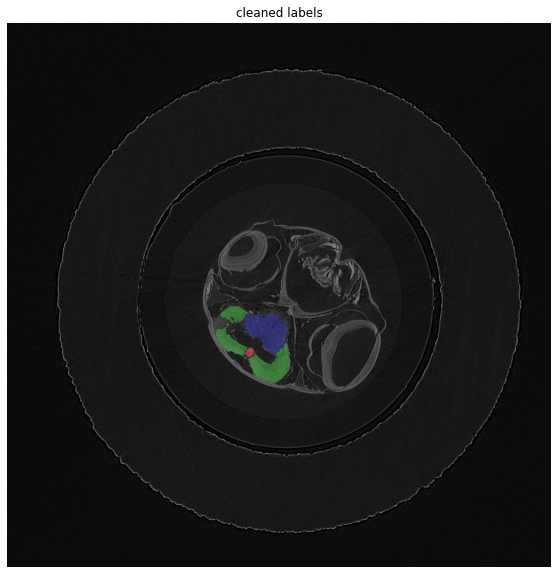

In [9]:
slc_id = 2991
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(imgviz.label2rgb(lbl_raw[slc_id], img[slc_id]))
plt.title('raw labels')
plt.show()

plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(imgviz.label2rgb(lbl[slc_id], img[slc_id]))
plt.title('cleaned labels')
plt.show()

In [10]:
db = TinyDB('tmp_data/debug.json')

In [11]:
import pandas as pd

In [13]:
from collections import defaultdict

def dict_to_planar(d):
    n_d = {}
    for k, v in d.items():
        if isinstance(v, dict):
            v = dict_to_planar(v)
            for sk, sv in v.items():
                n_d['.'.join([k, sk])] = sv
        else:
            n_d[k] = v
    return n_d

def records_to_table(records):
    fields = {k for record in records for k in records[0].keys()}        

    result = defaultdict(list)
    for record in records:
        for fieldname in fields:
            subfields = fieldname.split('.')
            curview = record
            for subfieldname in subfields:
                if subfieldname in curview.keys():
                    curview = curview[subfieldname]
                else:
                    curview = None
                    break
            result[fieldname].append(curview)

    result = [dict(zip(result,t)) for t in zip(*result.values())]  # result as list of dicts instead of dict of lists
    result = [dict_to_planar(record) for record in result]
    return result

In [20]:
df = pd.DataFrame(records_to_table(db.all()))
df = df.set_index('id', drop=True)
df

,brain.optical_nerves.volume,brain.optical_nerves.surface_area,brain.optical_nerves.color_mean,brain.optical_nerves.color_mean_dilated,brain.optical_nerves.color_median,brain.optical_nerves.color_median_dilated,brain.optical_nerves.color_std,brain.optical_nerves.color_std_dilated,brain.optical_nerves.color_perc_1,brain.optical_nerves.color_perc_1_dilated,...,brain.torus_longuthing.color_perc_99,brain.torus_longuthing.color_perc_99_dilated,brain.torus_longuthing.convex_volume,brain.torus_longuthing.radius_minimal_sphere,brain.hypophysis.color_perc_1,brain.hypophysis.color_perc_1_dilated,brain.hypophysis.color_perc_99,brain.hypophysis.color_perc_99_dilated,brain.hypophysis.convex_volume,brain.hypophysis.radius_minimal_sphere
id,,,,,,,,,,,,,,,,,,,,,
529,[3155],[3710],[151.11949286846277],[97.26438837826167],[150.0],[102.0],[16.91753046823822],[33.8880119441988],[117.0],[29.0],...,[179.0],[165.0],[9685.833333333332],[30.786422714264578],NaN,NaN,NaN,NaN,NaN,NaN
528,[12629],[12011],[137.6327500197957],[90.15223708092886],[135.0],[89.0],[22.834594251675984],[37.291411729811074],[91.0],[28.0],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
526,[24248],[18536],[140.8424612339162],[81.92035980087188],[137.0],[76.0],[26.150678308496236],[36.32422277570844],[86.0],[21.0],...,[177.0],[157.0],[10465.666666666668],[30.2713750821955],[77.0],[15.0],[160.0],[246.0],[1596.8333333333335],[10.014837645123082]
